### Imports

In [6]:
import numpy as np
import os
from matplotlib import pyplot as plt
from MALDI_class import MALDI, rawMALDI, binnedMALDI, selectedMALDI

### Load example data

In [2]:
name = 'brain201re-49_V1_pos'
path = '/data/datadata/40_MALDI/MALDI/brain201re-49/V1/RAW-Data/' + name + '.imzML'
savedir = 'expdata/test0/'
resolution = 1e-5
M = MALDI(path, resolution = resolution)

/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession MS:1000563 found with incorrect name "Thermo RAW file". Updating name to "Thermo RAW format".
  warn(
/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession MS:1000590 found with incorrect name "contact organization". Updating name to "contact affiliation".
  warn(
/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  warn(
/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  warn(
/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updati

### Print Metadata

In [3]:
M.print_metadata()

{'file_description': {'type': 'fileContent',
                      'MS1 spectrum': True,
                      'profile spectrum': True,
                      'universally unique identifier': '{25E35984-2347-4920-A79F-DE910FCF0A22}',
                      'ibd SHA-1': 'F44F56ACA54C1C4509A79B52C847BBF8713C81E2',
                      'processed': True,
                      'source_files': {'sf1': {'type': 'sourceFile',
                                               'id': 'sf1',
                                               'name': '20210614_JW_#2_Schnitt49_V1.raw',
                                               'location': 'C:\\Xcalibur\\data\\2021\\2021_Jan\\20210614_JW_#2_Schnitt49_V1\\',
                                               'Thermo RAW format': True,
                                               'Thermo nativeID format': True,
                                               'SHA-1': ''}},
                      'contacts': [{'type': 'contact',
                             

### Load raw data

In [3]:
M_raw = rawMALDI(M.filename, M.resolution, M.Range, M.n_processes)

### show TIC, single mass, single mass after normalization and center of mass images

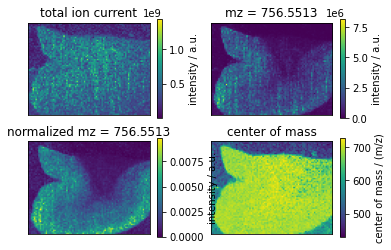

In [4]:
fig, axs = plt.subplots(2,2)

img = M_raw.get_2D(M_raw.sumpicture())
im = axs.flat[0].imshow(img)
axs.flat[0].set_xticks([])
axs.flat[0].set_yticks([])
axs.flat[0].set_title('total ion current')
fig.colorbar(im, ax = axs.flat[0], label = 'intensity / a.u.')

mzs = np.array([551.503, 605.548, 627.532, 697.478, 756.551, 768.588, 776.593, 781.622 ,784.583 ,790.608 ,810.598, 823.666, 832.664, 835.66, 835.669, 849.682, 863.698, 920.708])
mz = mzs[0]
#753.588017481237#756.5513
img = M_raw.get_2D(M_raw.massvec(mz))
im = axs.flat[1].imshow(img)
axs.flat[1].set_xticks([])
axs.flat[1].set_yticks([])
axs.flat[1].set_title('mz = 756.5513')
fig.colorbar(im, ax = axs.flat[1], label = 'intensity / a.u.')

M_raw.normalize()    #data is changed in place, multiple execution of code block will alter the first two plots, if the prior code block is not re-executed as well
img = M_raw.get_2D(M_raw.massvec(mz))
im = axs.flat[2].imshow(img)
axs.flat[2].set_xticks([])
axs.flat[2].set_yticks([])
axs.flat[2].set_title('normalized mz = 756.5513')
fig.colorbar(im, ax = axs.flat[2], label = 'intensity / a.u.')

img = M_raw.get_2D(M_raw.center_of_mass())
im = axs.flat[3].imshow(img)
axs.flat[3].set_xticks([])
axs.flat[3].set_yticks([])
axs.flat[3].set_title('center of mass')
fig.colorbar(im, ax = axs.flat[3], label = 'center of mass / (m/z)')
plt.show()

In [7]:
### GAUSS FITTING HIER NOCH ZEIGEN

if os.path.isfile(savedir + name + '_fitgauss' + '_chi_res.npy'):
    chi_res = np.load(savedir + name + '_fitgauss' + '_chi_res.npy')
    amp = np.load(savedir + name + '_fitgauss' + '_amps.npy')
    x0 = np.load(savedir + name + '_fitgauss' + '_x0.npy')
    sigma = np.load(savedir + name + '_fitgauss' + '_sigma.npy')
    amps_err = np.load(savedir + name + '_fitgauss' + '_amps_err.npy')
    x0_err = np.load(savedir + name + '_fitgauss' + '_x0_err.npy')
    sigma_err = np.load(savedir + name + '_fitgauss' + '_sigma_err.npy')
else:
    positions = mzs
    sigmas = (M_raw.resolution * positions)/(2*np.sqrt(2*np.log(2)))    #correct? shouldnt it be based on accuracy instead of resolution
    fitrange = M_raw.resolution*2
    accuracy = 2.5e-6
    amp = 0
    for pixel in M_raw.indices:
        amp += np.mean(M_raw.data_spectrum[pixel][1])
    amp /= len(M_raw.indices)
    amps = np.ones(mzs.shape)*amp

    results = M_raw.fit_gauss(positions, sigmas, amps, fitrange, maxvalue_factor = 100)
    print(results)
    chi_res, amp, x0, sigma, amps_err, x0_err, sigma_err = results

    np.save(savedir + name + '_fitgauss' + '_chi_res.npy', chi_res)
    np.save(savedir + name + '_fitgauss' + '_amps.npy', amp)
    np.save(savedir + name + '_fitgauss' + '_x0.npy', x0)
    np.save(savedir + name + '_fitgauss' + '_sigma.npy', sigma)
    np.save(savedir + name + '_fitgauss' + '_amps_err.npy', amps_err)
    np.save(savedir + name + '_fitgauss' + '_x0_err.npy', x0_err)
    np.save(savedir + name + '_fitgauss' + '_sigma_err.npy', sigma_err)

adding model for peak  0
peak 0 in pixel 134 not measured
peak 0 in pixel 1764 not measured
peak 0 in pixel 1888 not measured
peak 0 in pixel 2009 not measured
peak 0 in pixel 2021 not measured
peak 0 in pixel 2022 not measured
peak 0 in pixel 2512 not measured
peak 0 in pixel 2518 not measured
peak 0 in pixel 2527 not measured
peak 0 in pixel 2767 not measured
peak 0 in pixel 3156 not measured
peak 0 in pixel 3771 not measured
peak 0 in pixel 3911 not measured
peak 0 in pixel 4040 not measured
peak 0 in pixel 4168 not measured
peak 0 in pixel 4293 not measured
peak 0 in pixel 4294 not measured
peak 0 in pixel 4420 not measured
peak 0 in pixel 4784 not measured
peak 0 in pixel 5037 not measured
peak 0 in pixel 5164 not measured
peak 0 in pixel 5169 not measured
adding model for peak  1  5228
peak 1 in pixel 0 not measured
peak 1 in pixel 1 not measured
peak 1 in pixel 2 not measured
peak 1 in pixel 3 not measured
peak 1 in pixel 5 not measured
peak 1 in pixel 6 not measured
peak 1 in p

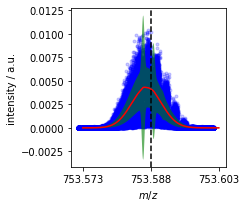

In [11]:
def gausss(x, amp, x0, sigma):
    return amp*np.exp(-((x-x0)/sigma)**2/2)
for peak in range(len(positions)):
    sampling = np.arange(positions[peak] - fitrange*positions[peak], positions[peak] + fitrange*positions[peak], accuracy)
    allgauss = np.zeros((sampling.shape[0], M_raw.indices.shape[0]))
    meany = 0
    my_label = 'data'
    indices = np.where(~np.isnan(x0[0,:]))[0]
    plt.figure(figsize=(3.5,3))
    for pixel in indices:
        print(pixel, end = '\r')
        minindex = M_raw.nearestmzindex(pixel, positions[peak] - fitrange*positions[peak])
        maxindex = M_raw.nearestmzindex(pixel, positions[peak] + fitrange*positions[peak])
        x = M_raw.data_spectrum[pixel][0][minindex:maxindex]
        y = M_raw.data_spectrum[pixel][1][minindex:maxindex]
        meany += np.mean(y)
        plt.plot(x, y, 'b.', label = my_label, alpha = .2)
        my_label = "_nolegend_"
        allgauss[:,pixel] = gausss(sampling, amp[peak, pixel], x0[peak, pixel], sigma[peak, pixel])

    meany /= np.max(M_raw.indices)
    avrggauss = np.mean(allgauss, axis = 1)
    sigmagauss = np.std(allgauss, axis = 1)
    plt.plot(sampling, avrggauss, 'red', label = 'average fit', zorder = 10001)
    plt.fill_between(sampling, avrggauss-sigmagauss, avrggauss+sigmagauss, facecolor='green', alpha=.6,label = 'Std of average fit', zorder = 10000)
    plt.axvline(positions[peak], linestyle = '--', color = 'k', label = 'standard', zorder = 10002)
    #plt.legend()
    plt.xlabel('$m/z$')
    plt.ylabel('intensity / a.u.')
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(True)
    plt.xticks([sampling[0], positions[peak], sampling[-1]])
    plt.gca().set_xticklabels([np.round(sampling[0], 3), np.round(positions[peak],3), np.round(sampling[-1], 3)])
    plt.tight_layout()
plt.show()

### Bin data

In [22]:
M_binned = binnedMALDI(M.filename, M.resolution, M.Range, M.n_processes, data_spectrum = M_raw.data_spectrum)

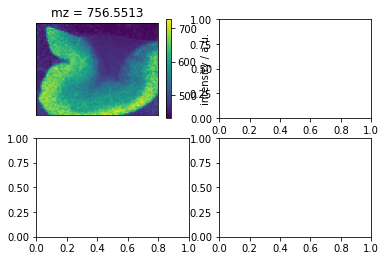

In [24]:
fig, axs = plt.subplots(2,2)
mz = 756.5513
img = M_binned.get_2D(M_binned.massvec(mz))
axs.flat[0].imshow(img)
axs.flat[0].set_xticks([])
axs.flat[0].set_yticks([])
axs.flat[0].set_title('mz = 756.5513')
fig.colorbar(im, ax = axs.flat[0], label = 'intensity / a.u.')
plt.show()

### now, add other binnedMALDI functions

### add metaspace class, make mz list and then try selected including mask_on